In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

/home/sharmila/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [4]:
df = pd.read_csv("Obfuscated-MalMem2022.csv")
df.head()

,Category,pslist.nproc,pslist.nppid,pslist.avg_threads,pslist.nprocs64bit,pslist.avg_handlers,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nhandles,handles.avg_handles_per_proc,...,svcscan.kernel_drivers,svcscan.fs_drivers,svcscan.process_services,svcscan.shared_process_services,svcscan.interactive_process_services,svcscan.nactive,callbacks.ncallbacks,callbacks.nanonymous,callbacks.ngeneric,Class
0,Benign,45,17,10.555556,0,202.844444,1694,38.500000,9129,212.302326,...,221,26,24,116,0,121,87,0,8,Benign
1,Benign,47,19,11.531915,0,242.234043,2074,44.127660,11385,242.234043,...,222,26,24,118,0,122,87,0,8,Benign
2,Benign,40,14,14.725000,0,288.225000,1932,48.300000,11529,288.225000,...,222,26,27,118,0,120,88,0,8,Benign
3,Benign,32,13,13.500000,0,264.281250,1445,45.156250,8457,264.281250,...,222,26,27,118,0,120,88,0,8,Benign
4,Benign,42,16,11.452381,0,281.333333,2067,49.214286,11816,281.333333,...,222,26,24,118,0,124,87,0,8,Benign


In [6]:
df.shape

(58596, 57)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58596 entries, 0 to 58595
Data columns (total 57 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Category                                58596 non-null  object 
 1   pslist.nproc                            58596 non-null  int64  
 2   pslist.nppid                            58596 non-null  int64  
 3   pslist.avg_threads                      58596 non-null  float64
 4   pslist.nprocs64bit                      58596 non-null  int64  
 5   pslist.avg_handlers                     58596 non-null  float64
 6   dlllist.ndlls                           58596 non-null  int64  
 7   dlllist.avg_dlls_per_proc               58596 non-null  float64
 8   handles.nhandles                        58596 non-null  int64  
 9   handles.avg_handles_per_proc            58596 non-null  float64
 10  handles.nport                           58596 non-null  in

In [8]:
df.isnull().sum()

Category                                  0
pslist.nproc                              0
pslist.nppid                              0
pslist.avg_threads                        0
pslist.nprocs64bit                        0
pslist.avg_handlers                       0
dlllist.ndlls                             0
dlllist.avg_dlls_per_proc                 0
handles.nhandles                          0
handles.avg_handles_per_proc              0
handles.nport                             0
handles.nfile                             0
handles.nevent                            0
handles.ndesktop                          0
handles.nkey                              0
handles.nthread                           0
handles.ndirectory                        0
handles.nsemaphore                        0
handles.ntimer                            0
handles.nsection                          0
handles.nmutant                           0
ldrmodules.not_in_load                    0
ldrmodules.not_in_init          

In [9]:
df["Category"].value_counts()

Category
Benign                                                                                        29298
Spyware-Transponder-0d2089d42657c69731270d8bb536b3c988ebc3fd632916a726871d074175954a-6.raw        2
Spyware-Transponder-0d2089d42657c69731270d8bb536b3c988ebc3fd632916a726871d074175954a-5.raw        2
Spyware-Transponder-0d2089d42657c69731270d8bb536b3c988ebc3fd632916a726871d074175954a-4.raw        2
Spyware-Transponder-0d2089d42657c69731270d8bb536b3c988ebc3fd632916a726871d074175954a-3.raw        2
                                                                                              ...  
Spyware-CWS-0d1f91b2b0c62c5d213df24a265288ad05d65d96f7ffd6ee7e9b09612b687dcd-9.raw                1
Spyware-CWS-0d1f91b2b0c62c5d213df24a265288ad05d65d96f7ffd6ee7e9b09612b687dcd-8.raw                1
Spyware-CWS-0d1f91b2b0c62c5d213df24a265288ad05d65d96f7ffd6ee7e9b09612b687dcd-7.raw                1
Spyware-CWS-0d1f91b2b0c62c5d213df24a265288ad05d65d96f7ffd6ee7e9b09612b687dcd-6.raw         

In [10]:
def find_category(column):
    if "-" in column:
        category = column.split("-")[0]
        return category
    else:
        return column

In [11]:
def find_category_name(column):
    if "-" in column:
        category_name = column.split("-")[1]
        return category_name
    else:
        return column

In [13]:
df["category"] = df["Category"].apply(find_category)
df

,Category,pslist.nproc,pslist.nppid,pslist.avg_threads,pslist.nprocs64bit,pslist.avg_handlers,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nhandles,handles.avg_handles_per_proc,...,svcscan.fs_drivers,svcscan.process_services,svcscan.shared_process_services,svcscan.interactive_process_services,svcscan.nactive,callbacks.ncallbacks,callbacks.nanonymous,callbacks.ngeneric,Class,category
0,Benign,45,17,10.555556,0,202.844444,1694,38.500000,9129,212.302326,...,26,24,116,0,121,87,0,8,Benign,Benign
1,Benign,47,19,11.531915,0,242.234043,2074,44.127660,11385,242.234043,...,26,24,118,0,122,87,0,8,Benign,Benign
2,Benign,40,14,14.725000,0,288.225000,1932,48.300000,11529,288.225000,...,26,27,118,0,120,88,0,8,Benign,Benign
3,Benign,32,13,13.500000,0,264.281250,1445,45.156250,8457,264.281250,...,26,27,118,0,120,88,0,8,Benign,Benign
4,Benign,42,16,11.452381,0,281.333333,2067,49.214286,11816,281.333333,...,26,24,118,0,124,87,0,8,Benign,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58591,Ransomware-Shade-fa03be3078d1b9840f06745f160eb...,37,15,10.108108,0,215.486487,1453,39.270270,7973,215.486487,...,26,24,116,0,120,86,0,8,Malware,Ransomware
58592,Ransomware-Shade-f56687137caf9a67678cde91e4614...,37,14,9.945946,0,190.216216,1347,36.405405,7038,190.216216,...,26,24,116,0,116,88,0,8,Malware,Ransomware
58593,Ransomware-Shade-faddeea111a25da4d0888f3044ae9...,38,15,9.842105,0,210.026316,1448,38.105263,7982,215.729730,...,26,24,116,0,120,88,0,8,Malware,Ransomware
58594,Ransomware-Shade-f866c086af2e1d8ebaa6f2c863157...,37,15,10.243243,0,215.513513,1452,39.243243,7974,215.513513,...,26,24,116,0,120,87,0,8,Malware,Ransomware


In [14]:
df["category"].value_counts()

category
Benign        29298
Spyware       10020
Ransomware     9791
Trojan         9487
Name: count, dtype: int64

<Axes: xlabel='category', ylabel='count'>

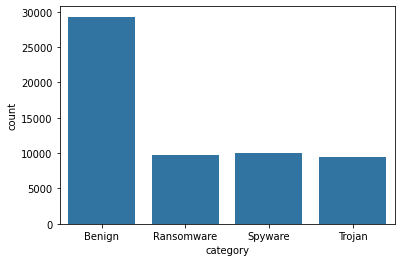

In [15]:
sns.countplot(x=df["category"])


<Axes: ylabel='count'>

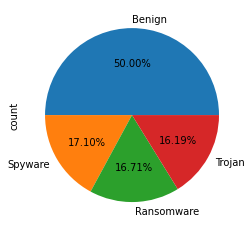

In [16]:
df["category"].value_counts().plot(kind="pie", autopct="%.2f%%")

In [18]:
df["category_name"] = df["Category"].apply(find_category_name)
df

,Category,pslist.nproc,pslist.nppid,pslist.avg_threads,pslist.nprocs64bit,pslist.avg_handlers,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nhandles,handles.avg_handles_per_proc,...,svcscan.process_services,svcscan.shared_process_services,svcscan.interactive_process_services,svcscan.nactive,callbacks.ncallbacks,callbacks.nanonymous,callbacks.ngeneric,Class,category,category_name
0,Benign,45,17,10.555556,0,202.844444,1694,38.500000,9129,212.302326,...,24,116,0,121,87,0,8,Benign,Benign,Benign
1,Benign,47,19,11.531915,0,242.234043,2074,44.127660,11385,242.234043,...,24,118,0,122,87,0,8,Benign,Benign,Benign
2,Benign,40,14,14.725000,0,288.225000,1932,48.300000,11529,288.225000,...,27,118,0,120,88,0,8,Benign,Benign,Benign
3,Benign,32,13,13.500000,0,264.281250,1445,45.156250,8457,264.281250,...,27,118,0,120,88,0,8,Benign,Benign,Benign
4,Benign,42,16,11.452381,0,281.333333,2067,49.214286,11816,281.333333,...,24,118,0,124,87,0,8,Benign,Benign,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58591,Ransomware-Shade-fa03be3078d1b9840f06745f160eb...,37,15,10.108108,0,215.486487,1453,39.270270,7973,215.486487,...,24,116,0,120,86,0,8,Malware,Ransomware,Shade
58592,Ransomware-Shade-f56687137caf9a67678cde91e4614...,37,14,9.945946,0,190.216216,1347,36.405405,7038,190.216216,...,24,116,0,116,88,0,8,Malware,Ransomware,Shade
58593,Ransomware-Shade-faddeea111a25da4d0888f3044ae9...,38,15,9.842105,0,210.026316,1448,38.105263,7982,215.729730,...,24,116,0,120,88,0,8,Malware,Ransomware,Shade
58594,Ransomware-Shade-f866c086af2e1d8ebaa6f2c863157...,37,15,10.243243,0,215.513513,1452,39.243243,7974,215.513513,...,24,116,0,120,87,0,8,Malware,Ransomware,Shade


In [19]:
df["category_name"].value_counts()

category_name
Benign          29298
Transponder      2410
Gator            2200
Shade            2128
CWS              2000
Scar             2000
180solutions     2000
Ako              2000
Refroso          2000
Conti            1988
Emotet           1967
Maze             1958
Zeus             1950
Pysa             1717
Reconyc          1570
TIBS             1410
Name: count, dtype: int64

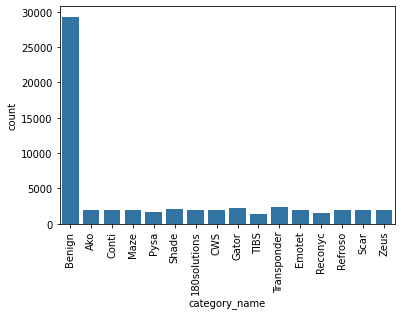

In [20]:
plt.figure()
sns.countplot(x=df["category_name"])
plt.xticks(rotation=90)
plt.show()

<Axes: ylabel='count'>

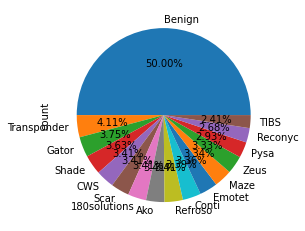

In [21]:
df["category_name"].value_counts().plot(kind="pie", autopct="%.2f%%")

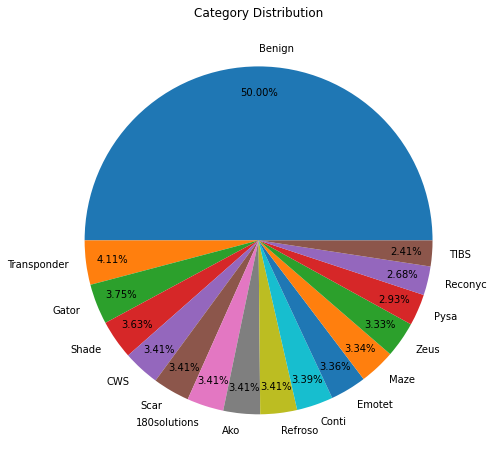

In [22]:
# better readable pie chart
import matplotlib.pyplot as plt

# Increase figure size to avoid congestion
plt.figure(figsize=(8, 8))
df["category_name"].value_counts().plot(
    kind="pie", 
    autopct="%.2f%%",    # Format to show percentage
    pctdistance=0.85,    # Distance of the autopct from center
    labeldistance=1.1    # Distance of the labels from center
)
plt.ylabel('')           # Remove the y-axis label if needed
plt.title("Category Distribution")
plt.show()


In [23]:
from sklearn.preprocessing import LabelEncoder

def label_encoder(column):
    le = LabelEncoder().fit(column)
    print(column.name, le.classes_)
    return le.transform(column)

In [24]:
df["category"] = label_encoder(df["category"])
df["category_name"] = label_encoder(df["category_name"])
df["class"] = label_encoder(df["Class"])

category ['Benign' 'Ransomware' 'Spyware' 'Trojan']
category_name ['180solutions' 'Ako' 'Benign' 'CWS' 'Conti' 'Emotet' 'Gator' 'Maze'
 'Pysa' 'Reconyc' 'Refroso' 'Scar' 'Shade' 'TIBS' 'Transponder' 'Zeus']
Class ['Benign' 'Malware']


In [25]:


df.drop(["Category", "Class"], axis=1, inplace=True)



In [26]:


df.head()



,pslist.nproc,pslist.nppid,pslist.avg_threads,pslist.nprocs64bit,pslist.avg_handlers,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nhandles,handles.avg_handles_per_proc,handles.nport,...,svcscan.process_services,svcscan.shared_process_services,svcscan.interactive_process_services,svcscan.nactive,callbacks.ncallbacks,callbacks.nanonymous,callbacks.ngeneric,category,category_name,class
0,45,17,10.555556,0,202.844444,1694,38.500000,9129,212.302326,0,...,24,116,0,121,87,0,8,0,2,0
1,47,19,11.531915,0,242.234043,2074,44.127660,11385,242.234043,0,...,24,118,0,122,87,0,8,0,2,0
2,40,14,14.725000,0,288.225000,1932,48.300000,11529,288.225000,0,...,27,118,0,120,88,0,8,0,2,0
3,32,13,13.500000,0,264.281250,1445,45.156250,8457,264.281250,0,...,27,118,0,120,88,0,8,0,2,0
4,42,16,11.452381,0,281.333333,2067,49.214286,11816,281.333333,0,...,24,118,0,124,87,0,8,0,2,0


In [27]:
X = df.drop("class", axis=1)
y = df["class"]

In [28]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_scaled = ss.fit_transform(X)

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [32]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [34]:
LogReg = LogisticRegression()
KNN = KNeighborsClassifier()
SupVec = SVC()
DT = DecisionTreeClassifier()
RF = RandomForestClassifier()
XGraBoost = XGBClassifier()

In [35]:
clfs = [
    ("Logistic Regression", LogReg),
    ("K-Nearest Neighbors", KNN),
    ("Support Vector", SupVec),
    ("Decision Tree", DT),
    ("Random Forest", RF),
    ("Extreme Gradient Boosting", XGraBoost)
]

In [38]:
scores_df_cols = ["Model Name", "Accuracy Score", "F1 Score", "Precision Score", "Recall Score"]
scores_df = pd.DataFrame(columns=scores_df_cols)

In [41]:
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Initialize the DataFrame with the required columns
scores_df = pd.DataFrame(columns=["Model Name", "Accuracy Score", "F1 Score", "Precision Score", "Recall Score"])

# Loop through each classifier
for clf_name, clf in clfs:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    # Create a DataFrame for the new row
    new_row = pd.DataFrame({
        "Model Name": [clf_name],
        "Accuracy Score": [accuracy_score(y_test, y_pred)],
        "F1 Score": [f1_score(y_test, y_pred)],
        "Precision Score": [precision_score(y_test, y_pred)],
        "Recall Score": [recall_score(y_test, y_pred)]
    })
    
    # Use pd.concat to add the new row to scores_df
    scores_df = pd.concat([scores_df, new_row], ignore_index=True)

# Now scores_df contains all the scores


/tmp/ipykernel_1272212/4293394023.py:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  scores_df = pd.concat([scores_df, new_row], ignore_index=True)


In [42]:
# for clf_name, clf in clfs:
#     clf.fit(X_train, y_train)
#     y_pred = clf.predict(X_test)
#     scores_df = scores_df.append({
#         "Model Name": clf_name,
#         "Accuracy Score": accuracy_score(y_test, y_pred),
#         "F1 Score": f1_score(y_test, y_pred),
#         "Precision Score": precision_score(y_test, y_pred),
#         "Recall Score": recall_score(y_test, y_pred)
#     }, ignore_index=True)

In [43]:
scores_df

,Model Name,Accuracy Score,F1 Score,Precision Score,Recall Score
0,Logistic Regression,0.999886,0.999887,1.0,0.999773
1,K-Nearest Neighbors,0.999886,0.999887,1.0,0.999773
2,Support Vector,1.000000,1.000000,1.0,1.000000
3,Decision Tree,1.000000,1.000000,1.0,1.000000
4,Random Forest,1.000000,1.000000,1.0,1.000000
5,Extreme Gradient Boosting,1.000000,1.000000,1.0,1.000000


In [44]:
model_names = scores_df["Model Name"].values
accuracy_scores = scores_df["Accuracy Score"].values
f1_scores = scores_df["F1 Score"].values
precision_scores = scores_df["Precision Score"].values
recall_scores = scores_df["Recall Score"].values


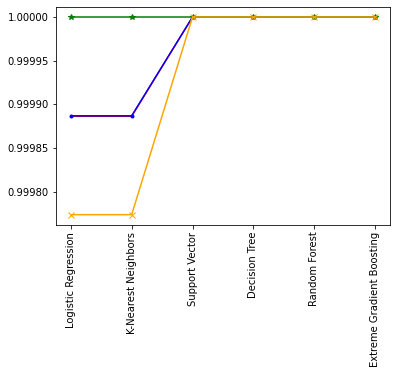

In [45]:
plt.figure()
plt.plot(model_names, accuracy_scores, color="red", marker=",")
plt.plot(model_names, f1_scores, color="blue", marker=".")
plt.plot(model_names, precision_scores, color="green", marker="*")
plt.plot(model_names, recall_scores, color="orange", marker="x")
plt.xticks(rotation=90)
plt.show()